# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

In [1]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
pd.set_option('max_columns', 50)

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_1samp

### Load the dataset

Load the cleaned dataset.

In [2]:
#your code here
wnba = pd.read_csv('../data/wnba_clean.csv', index_col=0)
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

In [3]:
# your answer here
"""
I can infer the population mean from a sample of the population using the Central Limit Theorem.

The requirements are:
- a sufficiently large sample size (>=30) --> yes, there are 142 records
- the sample has an approximately normal distribution --> yes, as seen before
- the observations are independent --> yes, supposedly the players are independent or I'll assume they are

Besides the confidence interval I could use hypothesis testing to see if the mean of the sample is significantly different
from 67kg.
"""

"\nI can infer the population mean from a sample of the population using the Central Limit Theorem.\n\nThe requirements are:\n- a sufficiently large sample size (>=30) --> yes, there are 142 records\n- the sample has an approximately normal distribution --> yes, as seen before\n- the observations are independent --> yes, supposedly the players are independent or I'll assume they are\n\nBesides the confidence interval I could use hypothesis testing to see if the mean of the sample is significantly different\nfrom 67kg.\n"

**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

In [4]:
# your code here
conf_int_weight = norm.interval(0.95, loc=wnba['Weight'].mean(), scale=wnba['Weight'].std())
conf_int_weight

(57.42689286914671, 100.53085360972653)

**What can you say about these results?**

In [5]:
#your-answer-here
"""
I can say with a confidence level of 95% that the mean weight of a professional female basketball player is between
57.4kg and 100.5kg.
"""

'\nI can say with a confidence level of 95% that the mean weight of a professional female basketball player is between\n57.4kg and 100.5kg.\n'

**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

In [6]:
#your-answer-here
"""
I would tell my grandmother that she is wrong because my sister with 67kg can actually play in a professional female
basketball league.
"""

'\nI would tell my grandmother that she is wrong because my sister with 67kg can actually play in a professional female\nbasketball league.\n'


## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

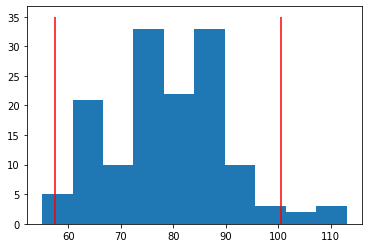

In [7]:
# your code here
fig, ax = plt.subplots(1, 1)
ax.hist(wnba['Weight'])
ax.vlines(conf_int_weight, 0, 35, colors='r')
plt.show()

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [8]:
# your answer here
"""
I can infer the population mean from a sample of the population using the Central Limit Theorem.

The requirements are:
- a sufficiently large sample size (>=30) --> no, there are only 14 records for this case (see next cell)
- the sample has an approximately normal distribution --> yes, as seen before
- the observations are independent --> yes, supposedly the players are independent or I'll assume they are
"""

"\nI can infer the population mean from a sample of the population using the Central Limit Theorem.\n\nThe requirements are:\n- a sufficiently large sample size (>=30) --> no, there are only 14 records for this case (see next cell)\n- the sample has an approximately normal distribution --> yes, as seen before\n- the observations are independent --> yes, supposedly the players are independent or I'll assume they are\n"

In [9]:
wnba_filter = wnba[wnba['FT%'] <= 60]
len(wnba_filter)

14

**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [10]:
# your code here
# As the sample is small I'll use the t-student interval
conf_int_FT = t.interval(0.95, df=(len(wnba_filter)-1), loc=wnba_filter['FT%'].mean(), scale=wnba_filter['FT%'].std())
conf_int_FT

(-23.785446515455078, 90.14258937259794)

**What can you comment about our result? What would you tell your sister?**

In [11]:
#your-answer-here
"""
First I saw that there are 14 players out of 142 that fail more than 40% of free throws, that is 9.9% which is small.

Then I can say with a confidence level of 95% that, among players that fail more than 40% of free throws, the mean percentage
of free throws made is between 0% and 90% (-23% makes no sense in this context).
As the sample is small the confidence interval is wide and do not tell me much.

I would tell my sister that she might be wrong mainly because of the 9.9% above, meaning that probably isn't the majority of
the players that fail the free throws.

Note: I'm might got it wrongly but I think the logic of what we should do in this question doesn't make much sense...
I would go for the total distribution of the %FT not for a slice of it.
"""

"\nFirst I saw that there are 14 players out of 142 that fail more than 40% of free throws, that is 9.9% which is small.\n\nThen I can say with a confidence level of 95% that, among players that fail more than 40% of free throws, the mean percentage\nof free throws made is between 0% and 90% (-23% makes no sense in this context).\nAs the sample is small the confidence interval is wide and do not tell me much.\n\nI would tell my sister that she might be wrong mainly because of the 9.9% above, meaning that probably isn't the majority of\nthe players that fail the free throws.\n\nNote: I'm might got it wrongly but I think the logic of what we should do in this question doesn't make much sense...\nI would go for the total distribution of the %FT not for a slice of it.\n"

# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

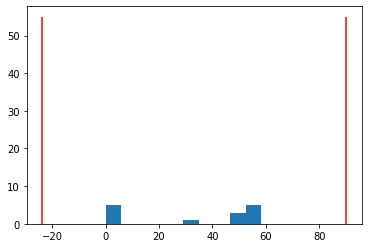

In [12]:
#your code here
fig, ax = plt.subplots(1, 1)
ax.hist(wnba_filter['FT%'])
ax.vlines(conf_int_FT, 0, 55, colors='r')
plt.show()

# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [13]:
#your-answer-here
"""
In this case I don't care about the population, I'm comparing two samples (WNBA and NBA).
I only have data from one of the samples but I have a combined value to compared with.
So I'll use hypothesis testing of one sample.

The requirements are:
- a sufficiently large sample size (>=30) --> yes, there are 142 records
- the sample has an approximately normal distribution --> yes, as seen before
- the observations are independent --> yes, supposedly the players are independent or I'll assume they are
"""

"\nIn this case I don't care about the population, I'm comparing two samples (WNBA and NBA).\nI only have data from one of the samples but I have a combined value to compared with.\nSo I'll use hypothesis testing of one sample.\n\nThe requirements are:\n- a sufficiently large sample size (>=30) --> yes, there are 142 records\n- the sample has an approximately normal distribution --> yes, as seen before\n- the observations are independent --> yes, supposedly the players are independent or I'll assume they are\n"

**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [14]:
#your code here
t_satistics, p_value = ttest_1samp(wnba['AST'], 52)
t_satistics, p_value

(-2.1499947192482898, 0.033261541354107166)

In [16]:
#your-answer-here
"""
The p-value is <0.05 so I can reject the null hypothesis, meaning that the mean of assists of WNBA is significantly
different from 52.
The t_statistics is negative so the mean is lower that 52.
Conclusion: the mean of assists of WNBA is lower than the combined value of WNBA and NBA, so I would tell my brother-in-law
that he is wrong.
"""

'\nThe p-value is <0.05 so I can reject the null hypothesis, meaning that the mean of assists of WNBA is significantly\ndifferent from 52.\nThe t_statistics is negative so the mean is lower that 52.\nConclusion: the mean of assists of WNBA is lower than the combined value of WNBA and NBA, so I would tell my brother-in-law\nthat he is wrong.\n'

**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [17]:
#your-answer-here
"""
p-value/2 is still < 0.05 so the conclusion is the same.
"""

'\np-value/2 is still < 0.05 so the conclusion is the same.\n'

# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

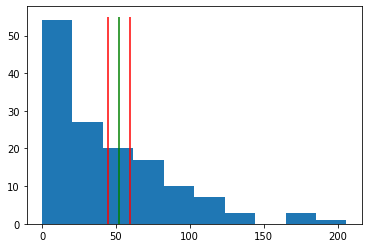

In [33]:
#your code here
fig, ax = plt.subplots(1, 1)
ax.hist(wnba['AST'])
ax.vlines(52, 0, 55, colors='g')
ax.vlines(52-t_satistics*wnba['AST'].std()/(len(wnba)**0.5), 0, 55, colors='r')
ax.vlines(52+t_satistics*wnba['AST'].std()/(len(wnba)**0.5), 0, 55, colors='r')
plt.show()

# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

In [19]:
#your-answer-here

In [20]:
# your code here

**What are your comments in regards to the results of the test?**

In [21]:
#your-answer-here